<a href="https://colab.research.google.com/github/iota07/jupyter-notebooks/blob/main/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Network in TensorFlow
There are many definitions for a regression problem but in our case, we're going to simplify it: predicting numerical variable based on some other combination of variables, even shorted...predicting a number.

In [1]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.15.0


### Creating some data to view and fit

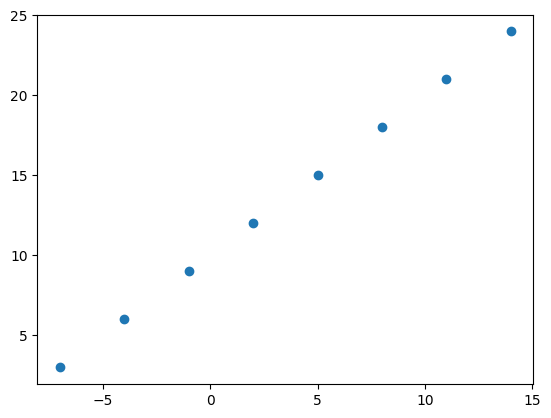

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visulize it
plt.scatter(X, y)

In [4]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [5]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom","bathroom","garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [8]:
X[0], y[0]

(-7.0, 3.0)

In [9]:
X[1], y[1]

(-4.0, 6.0)

In [10]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [11]:
X[0].ndim

0

In [12]:
X[0],y[0]

(-7.0, 3.0)

In [40]:
# Turn our NumPy array into tensors
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [15]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

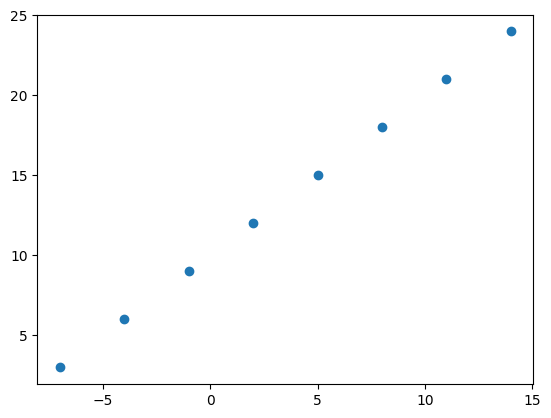

In [16]:
plt.scatter(X, y)

## Steps in modelling with TensorFlow
1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function ( in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evalution metric (what we can use to iterpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X & y (features and labels).


In [19]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, #mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # sgd is short for stochastic gradient descent
              metrics=["mae"]
              )

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=1), y, epochs=5) # expand X dimension by 1: from one dimension from two dimension

Epoch 1/5
1/1 [==============================] - 1s 678ms/step - loss: 17.2639 - mae: 17.2639
Epoch 2/5
1/1 [==============================] - 0s 29ms/step - loss: 16.9827 - mae: 16.9827
Epoch 3/5
1/1 [==============================] - 0s 14ms/step - loss: 16.7014 - mae: 16.7014
Epoch 4/5
1/1 [==============================] - 0s 19ms/step - loss: 16.4202 - mae: 16.4202
Epoch 5/5
1/1 [==============================] - 0s 15ms/step - loss: 16.1389 - mae: 16.1389


In [20]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [22]:
# Try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 36ms/step


array([[-10.116453]], dtype=float32)

In [25]:
y_pred + 16

array([[5.883547]], dtype=float32)

## Improving our model

We can improve our model by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers,
increase the number of hidden units (all called neurons)
within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fittin a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).



In [27]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"]
              )

# 3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 478ms/step - loss: 17.6417 - mae: 17.6417
Epoch 2/100
1/1 [==============================] - 0s 16ms/step - loss: 17.3604 - mae: 17.3604
Epoch 3/100
1/1 [==============================] - 0s 15ms/step - loss: 17.0792 - mae: 17.0792
Epoch 4/100
1/1 [==============================] - 0s 15ms/step - loss: 16.7979 - mae: 16.7979
Epoch 5/100
1/1 [==============================] - 0s 16ms/step - loss: 16.5167 - mae: 16.5167
Epoch 6/100
1/1 [==============================] - 0s 16ms/step - loss: 16.2354 - mae: 16.2354
Epoch 7/100
1/1 [==============================] - 0s 19ms/step - loss: 15.9542 - mae: 15.9542
Epoch 8/100
1/1 [==============================] - 0s 13ms/step - loss: 15.6729 - mae: 15.6729
Epoch 9/100
1/1 [==============================] - 0s 13ms/step - loss: 15.3917 - mae: 15.3917
Epoch 10/100
1/1 [==============================] - 0s 12ms/step - loss: 15.1104 - mae: 15.1104
Epoch 11/100
1/1 [==============================

In [28]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [29]:
# Let's see if our model's prediction has improved...
model.predict([17.0])

1/1 [==============================] - 0s 153ms/step


array([[29.685236]], dtype=float32)

In [30]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"]
              )

# 3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 684ms/step - loss: 13.9311 - mae: 13.9311
Epoch 2/100
1/1 [==============================] - 0s 14ms/step - loss: 13.8797 - mae: 13.8797
Epoch 3/100
1/1 [==============================] - 0s 21ms/step - loss: 13.8305 - mae: 13.8305
Epoch 4/100
1/1 [==============================] - 0s 26ms/step - loss: 13.7832 - mae: 13.7832
Epoch 5/100
1/1 [==============================] - 0s 21ms/step - loss: 13.7377 - mae: 13.7377
Epoch 6/100
1/1 [==============================] - 0s 23ms/step - loss: 13.6937 - mae: 13.6937
Epoch 7/100
1/1 [==============================] - 0s 22ms/step - loss: 13.6512 - mae: 13.6512
Epoch 8/100
1/1 [==============================] - 0s 26ms/step - loss: 13.6098 - mae: 13.6098
Epoch 9/100
1/1 [==============================] - 0s 18ms/step - loss: 13.5695 - mae: 13.5695
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 13.5300 - mae: 13.5300
Epoch 11/100
1/1 [==============================

In [31]:
model.predict([17.0])

1/1 [==============================] - 0s 71ms/step


array([[31.307205]], dtype=float32)

In [46]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"]
              )

# 3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 739ms/step - loss: 13.4745 - mae: 13.4745
Epoch 2/100
1/1 [==============================] - 0s 18ms/step - loss: 12.7602 - mae: 12.7602
Epoch 3/100
1/1 [==============================] - 0s 18ms/step - loss: 12.0508 - mae: 12.0508
Epoch 4/100
1/1 [==============================] - 0s 13ms/step - loss: 11.3447 - mae: 11.3447
Epoch 5/100
1/1 [==============================] - 0s 16ms/step - loss: 10.6396 - mae: 10.6396
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 9.9333 - mae: 9.9333
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 9.2239 - mae: 9.2239
Epoch 8/100
1/1 [==============================] - 0s 13ms/step - loss: 8.5093 - mae: 8.5093
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 7.7869 - mae: 7.7869
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 7.0537 - mae: 7.0537
Epoch 11/100
1/1 [==============================] - 0s 10m

In [47]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [48]:
model.predict([17.0])

1/1 [==============================] - 0s 69ms/step


array([[26.581762]], dtype=float32)

## Evaluating a model